In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [8]:
df.head()
df.shape

(5572, 5)

### Process involved
1.Data cleaning 

2.EDA

3.Text preprocessing

4.Model building

5.Model Evaluation

6.Improvement

7.Website

8.Deploy

## 1.Data cleaning 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [13]:
#since we can see that last 3  columns have very less non null values,so we will drop these columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [15]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
#will rename the column name 
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [17]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df.target.value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['target']=le.fit_transform(df['target'])

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
df.duplicated().value_counts()

False    5169
True      403
dtype: int64

In [25]:
df=df.drop_duplicates(keep='first')
df.duplicated().value_counts()

False    5169
dtype: int64

In [26]:
df.shape

(5169, 2)

## 2. EDA

In [27]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

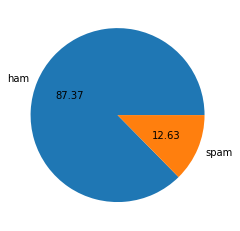

In [32]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show

In [34]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Lucky
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [38]:
df['num_characters']=df['text'].apply(len)
df.head()

C:\Users\LUCKYS~1\AppData\Local\Temp/ipykernel_4460/225104716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['text'].apply(len)


,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [46]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

C:\Users\LUCKYS~1\AppData\Local\Temp/ipykernel_4460/885831236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [47]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

C:\Users\LUCKYS~1\AppData\Local\Temp/ipykernel_4460/553570394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [61]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [62]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

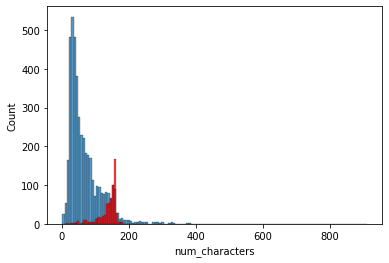

In [73]:
import seaborn as sns
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')


<AxesSubplot:xlabel='num_words', ylabel='Count'>

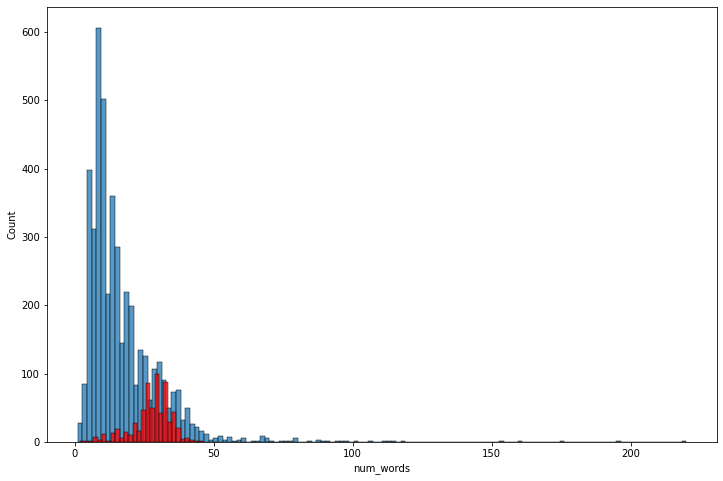

In [80]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

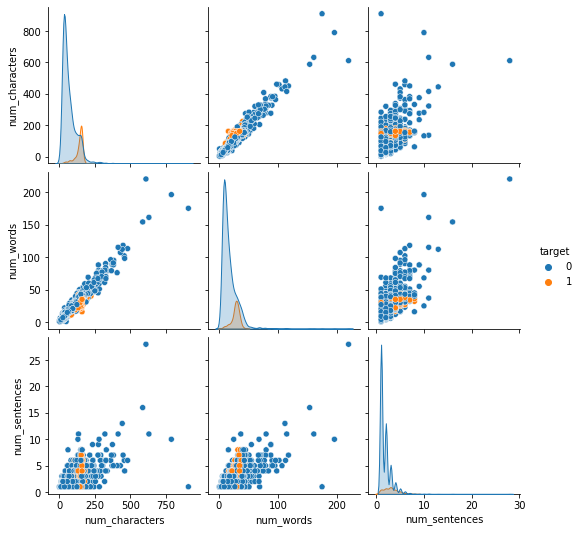

In [81]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

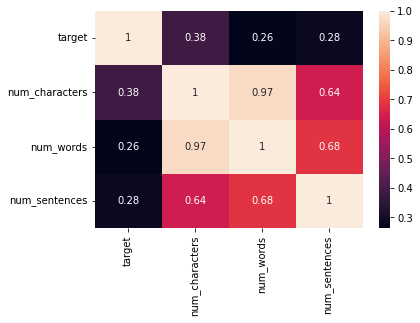

In [83]:
sns.heatmap(df.corr(),annot=True)

### 3.Data Preprocessing
1)Lower Case

2)Tokenization

3)Removing special characters and punctuations

4)Removing stop words

5)Stemming

In [122]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    for i in text:
        y.append(stemmer.stem(i))
    return " ".join(y)
    
    
    

In [126]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [125]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [129]:
df['transformed_text']=df['text'].apply(transform_text)

C:\Users\LUCKYS~1\AppData\Local\Temp/ipykernel_4460/4139466366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['text'].apply(transform_text)


In [130]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [147]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc=wc.generate_from_text(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

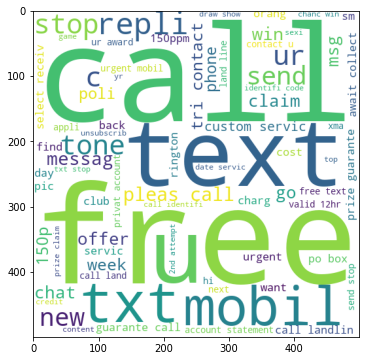

In [148]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

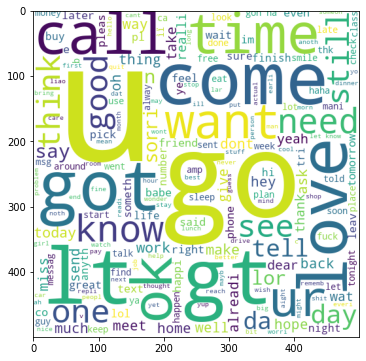

In [150]:
ham_wc=wc.generate_from_text(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [155]:
df[df['target']==1]['transformed_text'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [165]:
spam_lst=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_lst.append(word)
        

In [167]:
len(spam_lst)

9939

C:\Users\Lucky Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


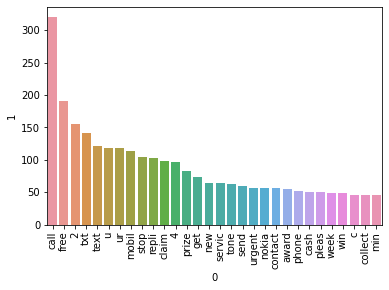

In [174]:
from collections import Counter
pd.DataFrame(Counter(spam_lst).most_common(30))
sns.barplot(pd.DataFrame(Counter(spam_lst).most_common(30))[0],pd.DataFrame(Counter(spam_lst).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [178]:
ham_lst=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_lst.append(word)
len(ham_lst)       

35394

C:\Users\Lucky Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


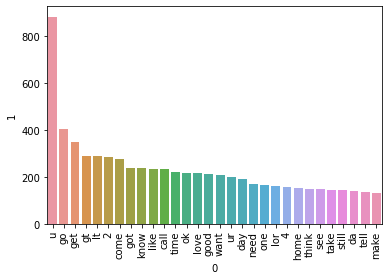

In [179]:
from collections import Counter
pd.DataFrame(Counter(ham_lst).most_common(30))
sns.barplot(pd.DataFrame(Counter(ham_lst).most_common(30))[0],pd.DataFrame(Counter(ham_lst).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### 4.Model Building 

In [180]:
#we will use Naive Bayse first since we know Naive Bayse perform good on Textual Data.

In [202]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(df['transformed_text']).toarray()

In [203]:
X.shape

(5169, 6708)

In [204]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [205]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
X_train.shape

(4135, 6708)

In [206]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [207]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [208]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_pred1,y_test))
print(confusion_matrix(y_pred1,y_test))
print(precision_score(y_pred1,y_test))

0.8800773694390716
[[792  20]
 [104 118]]
0.855072463768116


In [209]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_pred2,y_test))
print(confusion_matrix(y_pred2,y_test))
print(precision_score(y_pred2,y_test))

0.9642166344294004
[[871  12]
 [ 25 126]]
0.9130434782608695


In [210]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_pred3,y_test))
print(confusion_matrix(y_pred3,y_test))
print(precision_score(y_pred3,y_test))

0.9700193423597679
[[893  28]
 [  3 110]]
0.7971014492753623


In [211]:
from sklearn.model_selection import cross_val_score, KFold


# Define the number of folds (k)
k = 5  # You can choose any number of folds

# Initialize the machine learning model (you should replace this with your chosen model)
model1 = GaussianNB()
model2=MultinomialNB()
model3=BernoulliNB()

# Initialize k-fold cross-validation
kfold = KFold(n_splits=k, shuffle=True, random_state=42)  # You can customize the random_state

# Perform k-fold cross-validation and calculate accuracy for each fold
results_gnb = cross_val_score(model1, X, y, cv=kfold, scoring='accuracy')
results_mnb = cross_val_score(model2, X, y, cv=kfold, scoring='accuracy')
results_bnb = cross_val_score(model3, X, y, cv=kfold, scoring='accuracy')

# Calculate the mean accuracy across all folds
mean_accuracy_gnb = results_gnb.mean()
mean_accuracy_mnb = results_mnb.mean()
mean_accuracy_bnb = results_bnb.mean()

# Print the accuracy for each fold and the mean accuracy
#for fold, accuracy in enumerate(results, 1):
#   print(f'Fold {fold}: Accuracy = {accuracy:.4f}')

print(f'Mean Accuracy: {mean_accuracy_gnb:.4f}')
print(f'Mean Accuracy: {mean_accuracy_mnb:.4f}')
print(f'Mean Accuracy: {mean_accuracy_bnb:.4f}')

Mean Accuracy: 0.8669
Mean Accuracy: 0.9739
Mean Accuracy: 0.9692


In [219]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(df['transformed_text']).toarray()
y=df['target'].values


In [221]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
X_train.shape

(4135, 6708)

In [222]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_pred1,y_test))
print(confusion_matrix(y_pred1,y_test))
print(precision_score(y_pred1,y_test))

0.8762088974854932
[[793  25]
 [103 113]]
0.8188405797101449


In [223]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_pred2,y_test))
print(confusion_matrix(y_pred2,y_test))
print(precision_score(y_pred2,y_test))

0.9593810444874274
[[896  42]
 [  0  96]]
0.6956521739130435


In [224]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_pred3,y_test))
print(confusion_matrix(y_pred3,y_test))
print(precision_score(y_pred3,y_test))

0.9700193423597679
[[893  28]
 [  3 110]]
0.7971014492753623


In [225]:
from sklearn.model_selection import cross_val_score, KFold


# Define the number of folds (k)
k = 5  # You can choose any number of folds

# Initialize the machine learning model (you should replace this with your chosen model)
model1 = GaussianNB()
model2=MultinomialNB()
model3=BernoulliNB()

# Initialize k-fold cross-validation
kfold = KFold(n_splits=k, shuffle=True, random_state=42)  # You can customize the random_state

# Perform k-fold cross-validation and calculate accuracy for each fold
results_gnb = cross_val_score(model1, X, y, cv=kfold, scoring='accuracy')
results_mnb = cross_val_score(model2, X, y, cv=kfold, scoring='accuracy')
results_bnb = cross_val_score(model3, X, y, cv=kfold, scoring='accuracy')

# Calculate the mean accuracy across all folds
mean_accuracy_gnb = results_gnb.mean()
mean_accuracy_mnb = results_mnb.mean()
mean_accuracy_bnb = results_bnb.mean()

# Print the accuracy for each fold and the mean accuracy
#for fold, accuracy in enumerate(results, 1):
#   print(f'Fold {fold}: Accuracy = {accuracy:.4f}')

print(f'Mean Accuracy: {mean_accuracy_gnb:.4f}')
print(f'Mean Accuracy: {mean_accuracy_mnb:.4f}')
print(f'Mean Accuracy: {mean_accuracy_bnb:.4f}')

Mean Accuracy: 0.8730
Mean Accuracy: 0.9600
Mean Accuracy: 0.9692


In [231]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [232]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [233]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [234]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [235]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [236]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8380952380952381
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.9738878143133463
Precision -  1.0
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  xgb
Accuracy -  0.9729206963249516
Precision -  0.9365079365079365


In [237]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [238]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.973888,1.000000
8,ETC,0.975822,0.982906
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
4,LR,0.951644,0.940000
10,xgb,0.972921,0.936508
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595
